In [518]:
import pandas as pd
import seaborn as sns
import torch.nn.functional as F
import torch.optim as optim
import torch
import numpy as np

In [561]:
df = pd.read_csv('games.csv')

In [562]:
df.drop(columns=['Other_Sales', 'Global_Sales', 'Developer'], axis=1, inplace=True)

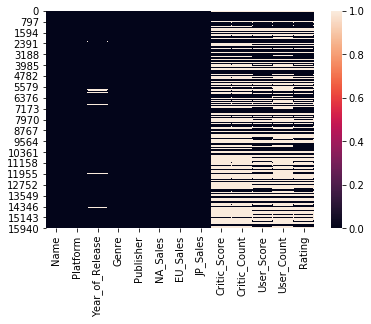

In [563]:
sns.heatmap(df.isnull())

In [564]:
df.shape

(16719, 13)

In [565]:
df.dropna(axis=0,inplace=True)

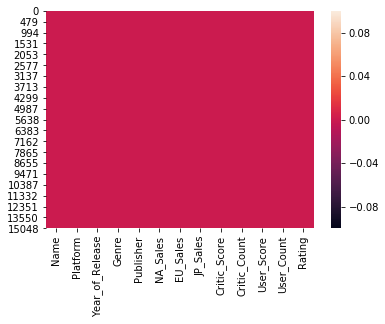

In [566]:
sns.heatmap(df.isnull())

In [567]:
df.shape

(6825, 13)

In [568]:
# Valores inconsistente
df = df.loc[df['NA_Sales'] > 1]

In [569]:
df.shape

(584, 13)

In [570]:
# Valores inconsistente
df = df.loc[df['EU_Sales'] > 1]

In [571]:
df.shape

(258, 13)

In [572]:
df['Name'].value_counts()

Grand Theft Auto V                        4
Battlefield 4                             3
Call of Duty: Ghosts                      3
Assassin's Creed IV: Black Flag           3
The Elder Scrolls V: Skyrim               3
                                         ..
Batman: Arkham Asylum                     1
StarCraft II: Wings of Liberty            1
The Legend of Zelda: Twilight Princess    1
Diablo III                                1
Mario Kart Wii                            1
Name: Name, Length: 223, dtype: int64

In [573]:
df.drop('Name', axis=1,inplace=True)

In [574]:
df

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,89.0,65.0,8.5,431.0,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...
568,PS,1998.0,Shooter,Electronic Arts,1.44,1.09,0.00,92.0,17.0,8.6,80.0,T
573,PS2,2003.0,Action,Ubisoft,1.15,1.11,0.00,89.0,24.0,7.7,102.0,T
591,Wii,2007.0,Sports,Nintendo,1.05,1.05,0.24,79.0,47.0,8,124.0,E10+
610,PS2,2001.0,Racing,Acclaim Entertainment,1.13,1.12,0.06,80.0,15.0,7.9,46.0,T


In [575]:
x = df.iloc[:,[0,1,2,3,7,8,9,10,11]].values
y = df.iloc[:,4:7].values

In [576]:
# Como temos dados categoricos, vamos realizar o one hot enconding
x

array([['Wii', 2006.0, 'Sports', ..., '8', 322.0, 'E'],
       ['Wii', 2008.0, 'Racing', ..., '8.3', 709.0, 'E'],
       ['Wii', 2009.0, 'Sports', ..., '8', 192.0, 'E'],
       ...,
       ['Wii', 2007.0, 'Sports', ..., '8', 124.0, 'E10+'],
       ['PS2', 2001.0, 'Racing', ..., '7.9', 46.0, 'T'],
       ['PS2', 2003.0, 'Simulation', ..., '8.4', 42.0, 'T']], dtype=object)

In [577]:
y

array([[4.136e+01, 2.896e+01, 3.770e+00],
       [1.568e+01, 1.276e+01, 3.790e+00],
       [1.561e+01, 1.093e+01, 3.280e+00],
       [1.128e+01, 9.140e+00, 6.500e+00],
       [1.396e+01, 9.180e+00, 2.930e+00],
       [1.444e+01, 6.940e+00, 4.700e+00],
       [9.710e+00, 7.470e+00, 4.130e+00],
       [8.920e+00, 8.030e+00, 3.600e+00],
       [1.500e+01, 4.890e+00, 2.400e-01],
       [9.010e+00, 8.490e+00, 2.530e+00],
       [7.020e+00, 9.090e+00, 9.800e-01],
       [4.740e+00, 9.200e+00, 4.160e+00],
       [9.660e+00, 5.140e+00, 6.000e-02],
       [8.410e+00, 5.490e+00, 4.700e-01],
       [3.430e+00, 5.350e+00, 5.320e+00],
       [6.850e+00, 5.090e+00, 1.870e+00],
       [9.040e+00, 4.240e+00, 1.300e-01],
       [9.700e+00, 3.680e+00, 1.100e-01],
       [4.990e+00, 5.730e+00, 6.500e-01],
       [8.250e+00, 4.240e+00, 7.000e-02],
       [8.520e+00, 3.590e+00, 8.000e-02],
       [5.540e+00, 5.730e+00, 4.900e-01],
       [6.990e+00, 4.510e+00, 3.000e-01],
       [6.620e+00, 2.550e+00, 2.66

In [578]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [579]:
enconder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,2,3,8])], remainder='passthrough') # Ao setar o passthrough ele não apaga caso tiver um ele não categporico
x = enconder.fit_transform(x).toarray()

In [581]:
x.shape

(258, 61)

## Construção da Rede

In [256]:
import torch.nn as nn

In [257]:
# 61 + 3 / 2 = 32 neuronio
# 61 -> 32 -> 32 -> 3
class nn_regressor(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.dense0 = nn.Linear(in_features=61, out_features=32)
        self.dense1 = nn.Linear(32, 32)
        self.activation = nn.Sigmoid()
        self.output = nn.Linear(32, 3)
    
    def forward(self, x):
        x = self.dense0(x)
        x = self.activation(x)
        x = self.dense1(x)
        x = self.activation(x)
        x = self.output(x)
        return x

In [258]:
rede = nn_regressor()

In [259]:
criterio = nn.MSELoss()
optimizer = optim.Adam(rede.parameters())

In [286]:
x = torch.tensor(x, dtype=torch.float)

In [287]:
y = torch.tensor(y, dtype=torch.float)

In [262]:
dataset = torch.utils.data.TensorDataset(x, y) # Transforma em tensor dataset para fazer dataloader

In [263]:
# DataLoader faz o batch pega de  10 em 10 shuffle misturas os dados antes de seleciona-los
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

## Treinamento da Rede

In [264]:
# Rede ser processada em Gpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [265]:
device

'cuda'

In [266]:
rede.to(device)

nn_regressor(
  (dense0): Linear(in_features=61, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=32, bias=True)
  (activation): Sigmoid()
  (output): Linear(in_features=32, out_features=3, bias=True)
)

In [272]:
for epoch in range(2000):
    running_loss = 0. # Erro global 
    running_mse_0 = 0. # Erro do primeiro atributo
    running_mse_1 = 0.
    running_mse_2 = 0.
    for i, data in enumerate(train_loader): # Batch Size
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad() # Zera o gradient
        
        outputs = rede(inputs)
        mse_0 = F.mse_loss(outputs[:,0], labels[:,0]).item()
        mse_1 = F.mse_loss(outputs[:,1], labels[:,1]).item()
        mse_2 = F.mse_loss(outputs[:,2], labels[:,2]).item()
        
        running_mse_0 += mse_0 * len(inputs)
        running_mse_1 += mse_1 * len(inputs)
        running_mse_2 += mse_2 * len(inputs)
        
        loss = criterio(outputs, labels)
        loss.backward() # Repropragar os erros para trás
        
        optimizer.step()
        loss = loss.item()
        running_loss += loss * len(inputs)
    print('Epoca {:4d} finalizada: erro_0 {:6.4f} | erro_1 {:6.4f} | erro_2 {:6.4f} - custo {:6.4f}  '.format(
            epoch + 1, 
            running_mse_0 / len(dataset),
            running_mse_1 / len(dataset),
            running_mse_2 / len(dataset),
            running_loss / len(dataset)
            ))

Epoca    1 finalizada: erro_0 21.2129 | erro_1 10.7949 | erro_2 1.4443 - custo 11.1507  
Epoca    2 finalizada: erro_0 17.9586 | erro_1 8.7171 | erro_2 1.2281 - custo 9.3013  
Epoca    3 finalizada: erro_0 15.4327 | erro_1 7.4062 | erro_2 1.1722 - custo 8.0037  
Epoca    4 finalizada: erro_0 13.6193 | erro_1 6.5232 | erro_2 1.1717 - custo 7.1047  
Epoca    5 finalizada: erro_0 12.6129 | erro_1 6.0792 | erro_2 1.1716 - custo 6.6212  
Epoca    6 finalizada: erro_0 12.1794 | erro_1 5.9125 | erro_2 1.1682 - custo 6.4201  
Epoca    7 finalizada: erro_0 12.0076 | erro_1 5.8637 | erro_2 1.1705 - custo 6.3473  
Epoca    8 finalizada: erro_0 11.9642 | erro_1 5.8620 | erro_2 1.1670 - custo 6.3311  
Epoca    9 finalizada: erro_0 11.9459 | erro_1 5.8601 | erro_2 1.1666 - custo 6.3242  
Epoca   10 finalizada: erro_0 11.9478 | erro_1 5.8629 | erro_2 1.1669 - custo 6.3258  
Epoca   11 finalizada: erro_0 11.9561 | erro_1 5.8583 | erro_2 1.1654 - custo 6.3266  
Epoca   12 finalizada: erro_0 11.9406 | e

Epoca  189 finalizada: erro_0 11.9286 | erro_1 5.8273 | erro_2 1.1364 - custo 6.2974  
Epoca  190 finalizada: erro_0 11.8960 | erro_1 5.8113 | erro_2 1.1361 - custo 6.2811  
Epoca  191 finalizada: erro_0 11.9120 | erro_1 5.8296 | erro_2 1.1432 - custo 6.2949  
Epoca  192 finalizada: erro_0 11.9235 | erro_1 5.8325 | erro_2 1.1415 - custo 6.2991  
Epoca  193 finalizada: erro_0 11.8999 | erro_1 5.8064 | erro_2 1.1359 - custo 6.2807  
Epoca  194 finalizada: erro_0 11.9006 | erro_1 5.8109 | erro_2 1.1416 - custo 6.2844  
Epoca  195 finalizada: erro_0 11.9049 | erro_1 5.8130 | erro_2 1.1458 - custo 6.2879  
Epoca  196 finalizada: erro_0 11.9112 | erro_1 5.8100 | erro_2 1.1463 - custo 6.2892  
Epoca  197 finalizada: erro_0 11.8951 | erro_1 5.8069 | erro_2 1.1378 - custo 6.2799  
Epoca  198 finalizada: erro_0 11.9035 | erro_1 5.8076 | erro_2 1.1364 - custo 6.2825  
Epoca  199 finalizada: erro_0 11.9027 | erro_1 5.8110 | erro_2 1.1384 - custo 6.2841  
Epoca  200 finalizada: erro_0 11.8985 | err

Epoca  377 finalizada: erro_0 11.8657 | erro_1 5.8113 | erro_2 1.1329 - custo 6.2700  
Epoca  378 finalizada: erro_0 11.8747 | erro_1 5.8100 | erro_2 1.1420 - custo 6.2755  
Epoca  379 finalizada: erro_0 11.8731 | erro_1 5.8090 | erro_2 1.1345 - custo 6.2722  
Epoca  380 finalizada: erro_0 11.8829 | erro_1 5.8042 | erro_2 1.1345 - custo 6.2739  
Epoca  381 finalizada: erro_0 11.8731 | erro_1 5.8066 | erro_2 1.1356 - custo 6.2718  
Epoca  382 finalizada: erro_0 11.8697 | erro_1 5.8072 | erro_2 1.1372 - custo 6.2714  
Epoca  383 finalizada: erro_0 11.8790 | erro_1 5.8153 | erro_2 1.1376 - custo 6.2773  
Epoca  384 finalizada: erro_0 11.8727 | erro_1 5.8073 | erro_2 1.1366 - custo 6.2722  
Epoca  385 finalizada: erro_0 11.8660 | erro_1 5.8009 | erro_2 1.1358 - custo 6.2676  
Epoca  386 finalizada: erro_0 11.8807 | erro_1 5.8053 | erro_2 1.1362 - custo 6.2741  
Epoca  387 finalizada: erro_0 11.8745 | erro_1 5.8016 | erro_2 1.1340 - custo 6.2701  
Epoca  388 finalizada: erro_0 11.8757 | err

Epoca  565 finalizada: erro_0 11.9571 | erro_1 5.8590 | erro_2 1.1428 - custo 6.3196  
Epoca  566 finalizada: erro_0 11.9117 | erro_1 5.8320 | erro_2 1.1445 - custo 6.2961  
Epoca  567 finalizada: erro_0 11.9176 | erro_1 5.8349 | erro_2 1.1528 - custo 6.3018  
Epoca  568 finalizada: erro_0 11.9089 | erro_1 5.8203 | erro_2 1.1432 - custo 6.2908  
Epoca  569 finalizada: erro_0 11.8984 | erro_1 5.8139 | erro_2 1.1376 - custo 6.2833  
Epoca  570 finalizada: erro_0 11.9388 | erro_1 5.8359 | erro_2 1.1423 - custo 6.3057  
Epoca  571 finalizada: erro_0 11.8909 | erro_1 5.8041 | erro_2 1.1369 - custo 6.2773  
Epoca  572 finalizada: erro_0 11.9016 | erro_1 5.8208 | erro_2 1.1395 - custo 6.2873  
Epoca  573 finalizada: erro_0 11.9105 | erro_1 5.8384 | erro_2 1.1437 - custo 6.2975  
Epoca  574 finalizada: erro_0 11.9004 | erro_1 5.8143 | erro_2 1.1372 - custo 6.2840  
Epoca  575 finalizada: erro_0 11.8910 | erro_1 5.8128 | erro_2 1.1377 - custo 6.2805  
Epoca  576 finalizada: erro_0 11.9194 | err

Epoca  753 finalizada: erro_0 11.8579 | erro_1 5.8022 | erro_2 1.1352 - custo 6.2651  
Epoca  754 finalizada: erro_0 11.8580 | erro_1 5.7986 | erro_2 1.1350 - custo 6.2639  
Epoca  755 finalizada: erro_0 11.8595 | erro_1 5.7965 | erro_2 1.1371 - custo 6.2643  
Epoca  756 finalizada: erro_0 11.8669 | erro_1 5.8016 | erro_2 1.1339 - custo 6.2675  
Epoca  757 finalizada: erro_0 11.8634 | erro_1 5.7938 | erro_2 1.1352 - custo 6.2641  
Epoca  758 finalizada: erro_0 11.8545 | erro_1 5.8015 | erro_2 1.1382 - custo 6.2647  
Epoca  759 finalizada: erro_0 11.8602 | erro_1 5.7936 | erro_2 1.1389 - custo 6.2643  
Epoca  760 finalizada: erro_0 11.8609 | erro_1 5.7918 | erro_2 1.1322 - custo 6.2616  
Epoca  761 finalizada: erro_0 11.8670 | erro_1 5.7984 | erro_2 1.1418 - custo 6.2691  
Epoca  762 finalizada: erro_0 11.8922 | erro_1 5.8139 | erro_2 1.1352 - custo 6.2804  
Epoca  763 finalizada: erro_0 11.8468 | erro_1 5.7894 | erro_2 1.1365 - custo 6.2575  
Epoca  764 finalizada: erro_0 11.8596 | err

Epoca  941 finalizada: erro_0 11.8744 | erro_1 5.7959 | erro_2 1.1395 - custo 6.2699  
Epoca  942 finalizada: erro_0 11.8528 | erro_1 5.7886 | erro_2 1.1414 - custo 6.2610  
Epoca  943 finalizada: erro_0 11.8664 | erro_1 5.7959 | erro_2 1.1411 - custo 6.2678  
Epoca  944 finalizada: erro_0 11.8799 | erro_1 5.8030 | erro_2 1.1386 - custo 6.2738  
Epoca  945 finalizada: erro_0 11.8604 | erro_1 5.7943 | erro_2 1.1381 - custo 6.2643  
Epoca  946 finalizada: erro_0 11.8814 | erro_1 5.7982 | erro_2 1.1386 - custo 6.2727  
Epoca  947 finalizada: erro_0 11.8638 | erro_1 5.7930 | erro_2 1.1396 - custo 6.2655  
Epoca  948 finalizada: erro_0 11.8831 | erro_1 5.8051 | erro_2 1.1395 - custo 6.2759  
Epoca  949 finalizada: erro_0 11.8700 | erro_1 5.7712 | erro_2 1.1397 - custo 6.2603  
Epoca  950 finalizada: erro_0 11.9551 | erro_1 5.8663 | erro_2 1.1396 - custo 6.3203  
Epoca  951 finalizada: erro_0 11.9385 | erro_1 5.8616 | erro_2 1.1390 - custo 6.3130  
Epoca  952 finalizada: erro_0 11.9820 | err

Epoca 1129 finalizada: erro_0 11.9097 | erro_1 5.8528 | erro_2 1.1448 - custo 6.3024  
Epoca 1130 finalizada: erro_0 11.9052 | erro_1 5.8522 | erro_2 1.1423 - custo 6.2999  
Epoca 1131 finalizada: erro_0 11.9018 | erro_1 5.8614 | erro_2 1.1519 - custo 6.3050  
Epoca 1132 finalizada: erro_0 11.9262 | erro_1 5.8689 | erro_2 1.1490 - custo 6.3147  
Epoca 1133 finalizada: erro_0 11.9026 | erro_1 5.8509 | erro_2 1.1525 - custo 6.3020  
Epoca 1134 finalizada: erro_0 11.9116 | erro_1 5.8537 | erro_2 1.1425 - custo 6.3026  
Epoca 1135 finalizada: erro_0 11.9374 | erro_1 5.8587 | erro_2 1.1477 - custo 6.3146  
Epoca 1136 finalizada: erro_0 11.8920 | erro_1 5.8510 | erro_2 1.1427 - custo 6.2952  
Epoca 1137 finalizada: erro_0 11.8998 | erro_1 5.8472 | erro_2 1.1417 - custo 6.2962  
Epoca 1138 finalizada: erro_0 11.9118 | erro_1 5.8561 | erro_2 1.1463 - custo 6.3048  
Epoca 1139 finalizada: erro_0 11.9030 | erro_1 5.8595 | erro_2 1.1489 - custo 6.3038  
Epoca 1140 finalizada: erro_0 11.9087 | err

Epoca 1317 finalizada: erro_0 11.9089 | erro_1 5.8536 | erro_2 1.1483 - custo 6.3036  
Epoca 1318 finalizada: erro_0 11.9008 | erro_1 5.8475 | erro_2 1.1476 - custo 6.2986  
Epoca 1319 finalizada: erro_0 11.9149 | erro_1 5.8460 | erro_2 1.1467 - custo 6.3025  
Epoca 1320 finalizada: erro_0 11.9355 | erro_1 5.8496 | erro_2 1.1460 - custo 6.3104  
Epoca 1321 finalizada: erro_0 11.9033 | erro_1 5.8454 | erro_2 1.1528 - custo 6.3005  
Epoca 1322 finalizada: erro_0 11.9171 | erro_1 5.8625 | erro_2 1.1473 - custo 6.3090  
Epoca 1323 finalizada: erro_0 11.9068 | erro_1 5.8347 | erro_2 1.1468 - custo 6.2961  
Epoca 1324 finalizada: erro_0 11.9177 | erro_1 5.8457 | erro_2 1.1479 - custo 6.3037  
Epoca 1325 finalizada: erro_0 11.9116 | erro_1 5.8494 | erro_2 1.1510 - custo 6.3040  
Epoca 1326 finalizada: erro_0 11.9056 | erro_1 5.8369 | erro_2 1.1454 - custo 6.2960  
Epoca 1327 finalizada: erro_0 11.9025 | erro_1 5.8375 | erro_2 1.1475 - custo 6.2958  
Epoca 1328 finalizada: erro_0 11.8989 | err

Epoca 1505 finalizada: erro_0 11.8753 | erro_1 5.8375 | erro_2 1.1436 - custo 6.2855  
Epoca 1506 finalizada: erro_0 11.8759 | erro_1 5.8361 | erro_2 1.1428 - custo 6.2849  
Epoca 1507 finalizada: erro_0 11.8940 | erro_1 5.8461 | erro_2 1.1460 - custo 6.2954  
Epoca 1508 finalizada: erro_0 11.8616 | erro_1 5.8321 | erro_2 1.1422 - custo 6.2786  
Epoca 1509 finalizada: erro_0 11.8791 | erro_1 5.8405 | erro_2 1.1433 - custo 6.2876  
Epoca 1510 finalizada: erro_0 11.8694 | erro_1 5.8358 | erro_2 1.1436 - custo 6.2830  
Epoca 1511 finalizada: erro_0 11.8866 | erro_1 5.8430 | erro_2 1.1442 - custo 6.2913  
Epoca 1512 finalizada: erro_0 11.8707 | erro_1 5.8385 | erro_2 1.1491 - custo 6.2861  
Epoca 1513 finalizada: erro_0 11.8745 | erro_1 5.8369 | erro_2 1.1434 - custo 6.2849  
Epoca 1514 finalizada: erro_0 11.8767 | erro_1 5.8431 | erro_2 1.1486 - custo 6.2895  
Epoca 1515 finalizada: erro_0 11.8851 | erro_1 5.8442 | erro_2 1.1417 - custo 6.2903  
Epoca 1516 finalizada: erro_0 11.8735 | err

Epoca 1693 finalizada: erro_0 11.8924 | erro_1 5.8384 | erro_2 1.1446 - custo 6.2918  
Epoca 1694 finalizada: erro_0 11.8844 | erro_1 5.8398 | erro_2 1.1418 - custo 6.2887  
Epoca 1695 finalizada: erro_0 11.8752 | erro_1 5.8364 | erro_2 1.1426 - custo 6.2848  
Epoca 1696 finalizada: erro_0 11.8799 | erro_1 5.8370 | erro_2 1.1481 - custo 6.2883  
Epoca 1697 finalizada: erro_0 11.8723 | erro_1 5.8396 | erro_2 1.1433 - custo 6.2850  
Epoca 1698 finalizada: erro_0 11.8726 | erro_1 5.8344 | erro_2 1.1445 - custo 6.2839  
Epoca 1699 finalizada: erro_0 11.8695 | erro_1 5.8424 | erro_2 1.1435 - custo 6.2851  
Epoca 1700 finalizada: erro_0 11.8756 | erro_1 5.8383 | erro_2 1.1426 - custo 6.2855  
Epoca 1701 finalizada: erro_0 11.8733 | erro_1 5.8391 | erro_2 1.1438 - custo 6.2854  
Epoca 1702 finalizada: erro_0 11.8610 | erro_1 5.8361 | erro_2 1.1424 - custo 6.2798  
Epoca 1703 finalizada: erro_0 11.8927 | erro_1 5.8453 | erro_2 1.1430 - custo 6.2937  
Epoca 1704 finalizada: erro_0 11.8725 | err

Epoca 1881 finalizada: erro_0 11.8897 | erro_1 5.8422 | erro_2 1.1434 - custo 6.2918  
Epoca 1882 finalizada: erro_0 11.8758 | erro_1 5.8370 | erro_2 1.1430 - custo 6.2853  
Epoca 1883 finalizada: erro_0 11.9063 | erro_1 5.8521 | erro_2 1.1423 - custo 6.3002  
Epoca 1884 finalizada: erro_0 11.8691 | erro_1 5.8359 | erro_2 1.1440 - custo 6.2830  
Epoca 1885 finalizada: erro_0 11.8717 | erro_1 5.8376 | erro_2 1.1424 - custo 6.2839  
Epoca 1886 finalizada: erro_0 11.9026 | erro_1 5.8583 | erro_2 1.1462 - custo 6.3024  
Epoca 1887 finalizada: erro_0 11.8644 | erro_1 5.8370 | erro_2 1.1418 - custo 6.2810  
Epoca 1888 finalizada: erro_0 11.8709 | erro_1 5.8347 | erro_2 1.1431 - custo 6.2829  
Epoca 1889 finalizada: erro_0 11.8631 | erro_1 5.8369 | erro_2 1.1427 - custo 6.2809  
Epoca 1890 finalizada: erro_0 11.8829 | erro_1 5.8581 | erro_2 1.1469 - custo 6.2959  
Epoca 1891 finalizada: erro_0 11.8628 | erro_1 5.8334 | erro_2 1.1456 - custo 6.2806  
Epoca 1892 finalizada: erro_0 11.8773 | err

## Fase de teste

In [276]:
rede.eval()

nn_regressor(
  (dense0): Linear(in_features=61, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=32, bias=True)
  (activation): Sigmoid()
  (output): Linear(in_features=32, out_features=3, bias=True)
)

In [293]:
x = x.to(device)
saidas_previstas = rede.forward(x)

In [294]:
saidas_previstas

tensor([[3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [4.1124, 2.7251, 0.2224],
        [3.2698, 2.3363, 0.6104],
        [4.1124, 2.7251, 0.2224],
        [3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [3.0565, 2.6233, 0.1314],
        [3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [3.9535, 2.8214, 0.1053],
        [3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [3.2698, 2.3363, 0.6104],
        [4.1124, 2.7251, 0.2224],
        [3.269

In [296]:
saidas_previstas = saidas_previstas.cpu().detach().numpy()

In [297]:
saidas_previstas.mean(axis=0)

array([3.3048537, 2.3640578, 0.5779309], dtype=float32)

In [303]:
y.mean(axis=0)

tensor([3.2838, 2.3505, 0.5862])

## Prever valor totais de venda

In [604]:
df = pd.read_csv('games.csv')

In [605]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [606]:
df.drop(columns=['Other_Sales', 'NA_Sales','EU_Sales', 'JP_Sales', 'Developer', 'Name'], axis=1, inplace=True)

In [607]:
df

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii,2006.0,Sports,Nintendo,82.53,76.0,51.0,8,322.0,E
1,NES,1985.0,Platform,Nintendo,40.24,NaN,NaN,NaN,NaN,NaN
2,Wii,2008.0,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,E
3,Wii,2009.0,Sports,Nintendo,32.77,80.0,73.0,8,192.0,E
4,GB,1996.0,Role-Playing,Nintendo,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
16714,PS3,2016.0,Action,Tecmo Koei,0.01,NaN,NaN,NaN,NaN,NaN
16715,X360,2006.0,Sports,Codemasters,0.01,NaN,NaN,NaN,NaN,NaN
16716,PSV,2016.0,Adventure,Idea Factory,0.01,NaN,NaN,NaN,NaN,NaN
16717,GBA,2003.0,Platform,Wanadoo,0.01,NaN,NaN,NaN,NaN,NaN


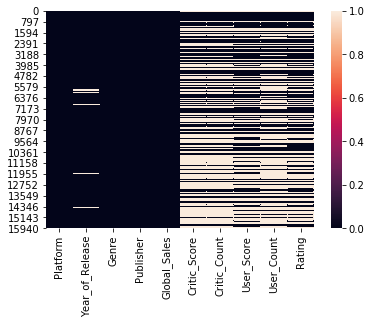

In [608]:
sns.heatmap(df.isnull())

In [609]:
df.dropna(inplace=True)

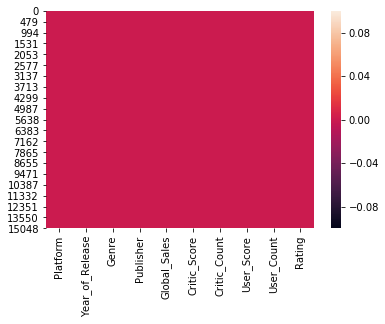

In [610]:
sns.heatmap(df.isnull())

In [611]:
df = df.loc[df['Global_Sales'] > 1]

In [612]:
df.shape

(1307, 10)

In [613]:
x = df.iloc[:, [0,1,2,3,5,6,7,8,9]].values
y = df.iloc[:, 4].values

In [614]:
enconder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,2,3,8])], remainder='passthrough')

In [615]:
x = enconder.fit_transform(x).toarray()

In [616]:
# 99 + 1 / 2 = 50  

# Construção da rede
class model_regressor(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.dense0 = nn.Linear(99, 50)
        self.dense1 = nn.Linear(50, 50)
        self.activation = nn.Sigmoid()
        self.output = nn.Linear(50,1)
    
    def forward(self, x):
        x = self.dense0(x)
        x = self.activation(x)
        x = self.dense1(x)
        x = self.activation(x)
        x = self.output(x)
        return x

In [617]:
model = model_regressor()

In [618]:
criterio = nn.MSELoss()

In [619]:
optimizer = optim.Adam(model.parameters())

In [620]:
x

array([[  0. ,   0. ,   0. , ...,  51. ,   8. , 322. ],
       [  0. ,   0. ,   0. , ...,  73. ,   8.3, 709. ],
       [  0. ,   0. ,   0. , ...,  73. ,   8. , 192. ],
       ...,
       [  0. ,   0. ,   0. , ...,  73. ,   7. , 189. ],
       [  0. ,   0. ,   0. , ...,  70. ,   7.7, 758. ],
       [  0. ,   0. ,   0. , ...,  74. ,   8. , 273. ]])

In [621]:
x = torch.tensor(x, dtype=torch.float)

In [622]:
y = torch.tensor(y, dtype=torch.float)

In [1]:
dataset = torch.utils.data.TensorDataset(x, y)

NameError: name 'torch' is not defined

In [625]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [626]:
# Configurando GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [627]:
device

'cuda'

In [628]:
model.to(device)

model_regressor(
  (dense0): Linear(in_features=99, out_features=50, bias=True)
  (dense1): Linear(in_features=50, out_features=50, bias=True)
  (activation): Sigmoid()
  (output): Linear(in_features=50, out_features=1, bias=True)
)

In [637]:
for epoch in range(1000):
    running_loss = 0.
    running_mse = 0.
    for i, data in enumerate(train_loader): # Batch
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad() # Zero para cada Batch
        
        outputs = model(inputs)
        mse =  F.mse_loss(outputs, labels).item()
        
        running_mse += mse 
        
        loss = criterio(outputs, labels)
        criterio = nn.MSELoss()
        
        loss.backward() # Repropragar os erros para trás
        optimizer.step()
        loss = loss.item()
        running_loss += loss 
        
    print('Epoca {:4d} finalizada: erro_0 {:6.4f} | custo {:6.4f}  '.format(
            epoch + 1, 
            running_mse/ len(dataset),
            running_loss / len(dataset)
            ))

D:\Desenvolvimento\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  # This is added back by InteractiveShellApp.init_path()
D:\Desenvolvimento\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  # This is added back by InteractiveShellApp.init_path()


Epoca    1 finalizada: erro_0 1.4642 | custo 1.4642  
Epoca    2 finalizada: erro_0 1.4663 | custo 1.4663  
Epoca    3 finalizada: erro_0 1.4658 | custo 1.4658  
Epoca    4 finalizada: erro_0 1.4636 | custo 1.4636  
Epoca    5 finalizada: erro_0 1.4631 | custo 1.4631  
Epoca    6 finalizada: erro_0 1.4667 | custo 1.4667  
Epoca    7 finalizada: erro_0 1.4657 | custo 1.4657  
Epoca    8 finalizada: erro_0 1.4639 | custo 1.4639  
Epoca    9 finalizada: erro_0 1.4639 | custo 1.4639  
Epoca   10 finalizada: erro_0 1.4639 | custo 1.4639  
Epoca   11 finalizada: erro_0 1.4632 | custo 1.4632  
Epoca   12 finalizada: erro_0 1.4636 | custo 1.4636  
Epoca   13 finalizada: erro_0 1.4636 | custo 1.4636  
Epoca   14 finalizada: erro_0 1.4628 | custo 1.4628  
Epoca   15 finalizada: erro_0 1.4635 | custo 1.4635  
Epoca   16 finalizada: erro_0 1.4640 | custo 1.4640  
Epoca   17 finalizada: erro_0 1.4668 | custo 1.4668  
Epoca   18 finalizada: erro_0 1.4635 | custo 1.4635  
Epoca   19 finalizada: erro_

Epoca  303 finalizada: erro_0 1.4643 | custo 1.4643  
Epoca  304 finalizada: erro_0 1.4636 | custo 1.4636  
Epoca  305 finalizada: erro_0 1.6717 | custo 1.6717  
Epoca  306 finalizada: erro_0 1.4640 | custo 1.4640  
Epoca  307 finalizada: erro_0 1.4642 | custo 1.4642  
Epoca  308 finalizada: erro_0 1.4661 | custo 1.4661  
Epoca  309 finalizada: erro_0 1.4647 | custo 1.4647  
Epoca  310 finalizada: erro_0 1.4633 | custo 1.4633  
Epoca  311 finalizada: erro_0 1.4642 | custo 1.4642  
Epoca  312 finalizada: erro_0 1.4627 | custo 1.4627  
Epoca  313 finalizada: erro_0 1.4645 | custo 1.4645  
Epoca  314 finalizada: erro_0 1.4637 | custo 1.4637  
Epoca  315 finalizada: erro_0 1.4639 | custo 1.4639  
Epoca  316 finalizada: erro_0 1.4637 | custo 1.4637  
Epoca  317 finalizada: erro_0 1.4856 | custo 1.4856  
Epoca  318 finalizada: erro_0 1.4656 | custo 1.4656  
Epoca  319 finalizada: erro_0 1.4677 | custo 1.4677  
Epoca  320 finalizada: erro_0 1.4659 | custo 1.4659  
Epoca  321 finalizada: erro_

Epoca  605 finalizada: erro_0 1.4637 | custo 1.4637  
Epoca  606 finalizada: erro_0 1.4671 | custo 1.4671  
Epoca  607 finalizada: erro_0 1.4636 | custo 1.4636  
Epoca  608 finalizada: erro_0 1.4643 | custo 1.4643  
Epoca  609 finalizada: erro_0 1.4643 | custo 1.4643  
Epoca  610 finalizada: erro_0 1.4638 | custo 1.4638  
Epoca  611 finalizada: erro_0 1.4638 | custo 1.4638  
Epoca  612 finalizada: erro_0 1.4642 | custo 1.4642  
Epoca  613 finalizada: erro_0 1.4635 | custo 1.4635  
Epoca  614 finalizada: erro_0 1.4632 | custo 1.4632  
Epoca  615 finalizada: erro_0 1.4650 | custo 1.4650  
Epoca  616 finalizada: erro_0 1.4644 | custo 1.4644  
Epoca  617 finalizada: erro_0 1.4631 | custo 1.4631  
Epoca  618 finalizada: erro_0 1.4628 | custo 1.4628  
Epoca  619 finalizada: erro_0 1.4638 | custo 1.4638  
Epoca  620 finalizada: erro_0 1.4638 | custo 1.4638  
Epoca  621 finalizada: erro_0 1.4848 | custo 1.4848  
Epoca  622 finalizada: erro_0 1.4659 | custo 1.4659  
Epoca  623 finalizada: erro_

Epoca  907 finalizada: erro_0 1.4638 | custo 1.4638  
Epoca  908 finalizada: erro_0 1.4656 | custo 1.4656  
Epoca  909 finalizada: erro_0 1.4646 | custo 1.4646  
Epoca  910 finalizada: erro_0 1.6729 | custo 1.6729  
Epoca  911 finalizada: erro_0 1.4655 | custo 1.4655  
Epoca  912 finalizada: erro_0 1.4641 | custo 1.4641  
Epoca  913 finalizada: erro_0 1.4638 | custo 1.4638  
Epoca  914 finalizada: erro_0 1.4644 | custo 1.4644  
Epoca  915 finalizada: erro_0 1.4653 | custo 1.4653  
Epoca  916 finalizada: erro_0 1.4630 | custo 1.4630  
Epoca  917 finalizada: erro_0 1.4637 | custo 1.4637  
Epoca  918 finalizada: erro_0 1.4668 | custo 1.4668  
Epoca  919 finalizada: erro_0 1.4627 | custo 1.4627  
Epoca  920 finalizada: erro_0 1.4635 | custo 1.4635  
Epoca  921 finalizada: erro_0 1.4650 | custo 1.4650  
Epoca  922 finalizada: erro_0 1.4754 | custo 1.4754  
Epoca  923 finalizada: erro_0 1.4628 | custo 1.4628  
Epoca  924 finalizada: erro_0 1.4645 | custo 1.4645  
Epoca  925 finalizada: erro_

# Fase de teste

In [638]:
model.eval()

nn_regressor(
  (dense0): Linear(in_features=61, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=32, bias=True)
  (activation): Sigmoid()
  (output): Linear(in_features=32, out_features=3, bias=True)
)

In [639]:
x = x.to(device)

In [640]:
x = model.forward(x)

RuntimeError: size mismatch, m1: [1307 x 99], m2: [61 x 32] at C:/w/b/windows/pytorch/aten/src\THC/generic/THCTensorMathBlas.cu:283

In [ ]:
saidas_previstas = x.cpu().detach().numpy()

In [ ]:
saidas_previstas